In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout,Embedding,LSTM,Conv1D, MaxPooling1D, Flatten,GRU,BatchNormalization
from sklearn.preprocessing import LabelBinarizer
import sklearn.datasets as skds
from pathlib import Path

In [9]:
df=pd.read_csv('/kaggle/input/financial-sentiment-analysis/data.csv',usecols=['Sentence'])
df

,Sentence
0,The GeoSolutions technology will leverage Bene...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po..."
2,"For the last quarter of 2010 , Componenta 's n..."
3,According to the Finnish-Russian Chamber of Co...
4,The Swedish buyout firm has sold its remaining...
...,...
5837,RISING costs have forced packaging producer Hu...
5838,Nordic Walking was first used as a summer trai...
5839,"According shipping company Viking Line , the E..."
5840,"In the building and home improvement trade , s..."


In [10]:
df.drop_duplicates(subset='Sentence',inplace=True)
df

,Sentence
0,The GeoSolutions technology will leverage Bene...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po..."
2,"For the last quarter of 2010 , Componenta 's n..."
3,According to the Finnish-Russian Chamber of Co...
4,The Swedish buyout firm has sold its remaining...
...,...
5835,HSBC Says Unit to Book $585 Million Charge on ...
5836,Daily Mail parent company in talks with potent...
5838,Nordic Walking was first used as a summer trai...
5839,"According shipping company Viking Line , the E..."


In [11]:
from textblob import TextBlob


df[['Polarity', 'Subjectivity']] = df['Sentence'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [12]:
df

,Sentence,Polarity,Subjectivity
0,The GeoSolutions technology will leverage Bene...,0.209091,0.588636
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",0.022222,0.294444
2,"For the last quarter of 2010 , Componenta 's n...",0.000000,0.172917
3,According to the Finnish-Russian Chamber of Co...,0.062500,0.500000
4,The Swedish buyout firm has sold its remaining...,-0.100000,0.233333
...,...,...,...
5835,HSBC Says Unit to Book $585 Million Charge on ...,0.000000,0.000000
5836,Daily Mail parent company in talks with potent...,0.000000,0.500000
5838,Nordic Walking was first used as a summer trai...,0.250000,0.333333
5839,"According shipping company Viking Line , the E...",0.187500,0.437500


In [13]:
y = df['Polarity']
positive = 0
negative = 0
neutral = 0

for a in y:
    if a>0:
     positive=positive+1
    elif a<0:
     negative=negative+1
    else:
     neutral=neutral+1
numberOfTweetsAnalysed= positive+negative+neutral
print('Number of Tweets Analysed = '+str(numberOfTweetsAnalysed))
print('Positive tweets = '+str(positive))
print('Negative tweets = '+str(negative))
print('Neutral tweets = '+str(neutral))

Number of Tweets Analysed = 5322
Positive tweets = 1703
Negative tweets = 847
Neutral tweets = 2772


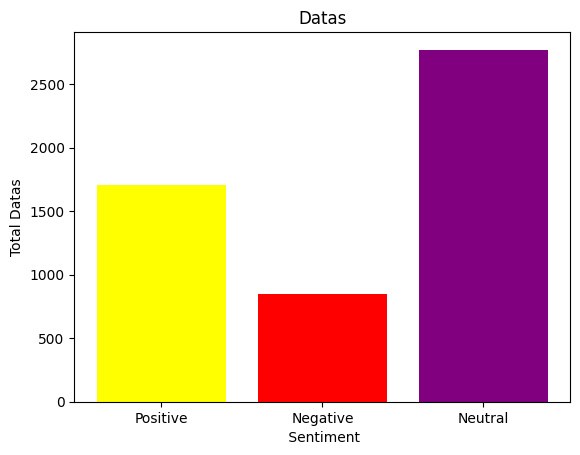

In [14]:
plt.bar(['Positive','Negative','Neutral'],[positive,negative,neutral],color=['yellow','red','purple'])
plt.title("Datas")
plt.xlabel(" Sentiment")
plt.ylabel("Total Datas")
plt.show()

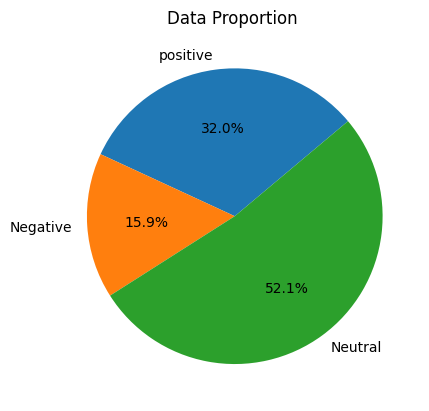

In [15]:

plt.pie([positive,negative,neutral], labels=['positive','Negative','Neutral'], autopct='%1.1f%%', startangle=40)
plt.title("Data Proportion ")
plt.show()

In [17]:
import spacy
import re,string
from nltk.corpus import stopwords
nlp = spacy.load('en_core_web_sm')
def preprocess(texts):
    doc = nlp(texts)
    text=" " .join([token.lemma_ for token in doc])
    text=' '.join(word for word in text.split() if word.lower() not in stopwords.words('english'))
    text = re.sub(r'\&\w*;','',text)
    text = re.sub('@[^\s]+','',text)
    text = re.sub(r'\$\w*','',text)
    text = text.lower()
    text = re.sub(r'https?:\/\/.*\/\w*','',text)
    text = re.sub(r'#\w*','',text)
    text = re.sub(r'[' + string.punctuation.replace('@','') + ']+',' ',text)
    text = re.sub(r'\b\w{1,2}\b','',text)
    text = re.sub(r'\s\s+',' ',text)
    text = re.sub("[^a-zA-Z]", " ", text)
    text=re.sub(r'\s+', ' ', text)
    text = text.lstrip(' ')
    text = ''.join(c for c in text if c <= '\uFFFF')
    return text

    




In [18]:
df['Sentence']=df['Sentence'].apply(lambda x:preprocess(x))

In [19]:
df

,Sentence,Polarity,Subjectivity
0,geosolutions technology leverage benefon gps s...,0.209091,0.588636
1,esi low real possibility,0.022222,0.294444
2,last quarter componenta net sale double eur eu...,0.000000,0.172917
3,accord finnish russian chamber commerce major ...,0.062500,0.500000
4,swedish buyout firm sell remain percent stake ...,-0.100000,0.233333
...,...,...,...
5835,hsbc say unit book million charge settlement,0.000000,0.000000
5836,daily mail parent company talk potential partn...,0.000000,0.500000
5838,nordic walking first use summer training metho...,0.250000,0.333333
5839,accord shipping company viking line decision s...,0.187500,0.437500


In [20]:
data=df

In [21]:
from textblob import TextBlob


data[['Polarity', 'Subjectivity']] = data['Sentence'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [44]:
y = data['Polarity']
positive = 0
negative = 0
neutral = 0

for a in y:
    if a>0:
     positive=positive+1
    elif a<0:
     negative=negative+1
    else:
     neutral=neutral+1
numberOfTweetsAnalysed= positive+negative+neutral
print('Number of Tweets Analysed = '+str(numberOfTweetsAnalysed))
print('Positive tweets = '+str(positive))
print('Negative tweets = '+str(negative))
print('Neutral tweets = '+str(neutral))

Number of Tweets Analysed = 5322
Positive tweets = 1719
Negative tweets = 761
Neutral tweets = 2842


#### We use the DataFrame that has been processed with TextBlob and preprocessed, instead of the DataFrame that is preprocessed and then analyzed with TextBlob.

In [23]:
df

,Sentence,Polarity,Subjectivity
0,geosolutions technology leverage benefon gps s...,0.209091,0.588636
1,esi low real possibility,0.100000,0.300000
2,last quarter componenta net sale double eur eu...,0.025000,0.091667
3,accord finnish russian chamber commerce major ...,0.031250,0.250000
4,swedish buyout firm sell remain percent stake ...,-0.100000,0.233333
...,...,...,...
5835,hsbc say unit book million charge settlement,0.000000,0.000000
5836,daily mail parent company talk potential partn...,0.000000,0.500000
5838,nordic walking first use summer training metho...,0.125000,0.166667
5839,accord shipping company viking line decision s...,0.187500,0.437500


In [45]:

df['category'] = df['Polarity'].apply(lambda x: 'Negative' if x < 0 else 'Positive' if x > 0 else 'Neutral')


In [46]:
print(set(df['category']))

{'Neutral', 'Negative', 'Positive'}


In [176]:

# # lets take 80% data as training and remaining 20% for test.
# train_size = int(len(df) * .8)

# train_posts = df['Sentence'][:train_size]
# train_tags = df['category'][:train_size]


# test_posts = df['Sentence'][train_size:]
# test_tags = df['category'][train_size:]

from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42,shuffle=True)

# Extract sentences and categories from the training set
train_posts = train_df['Sentence']
train_tags = train_df['category']

# Extract sentences and categories from the test set
test_posts = test_df['Sentence']
test_tags = test_df['category']


In [177]:

num_labels = 3
vocab_size = 1500
batch_size = 32

# define Tokenizer with Vocab Size
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(train_posts)

x_train = tokenizer.texts_to_matrix(train_posts, mode='tfidf')

x_test = tokenizer.texts_to_matrix(test_posts, mode='tfidf')
encoder = LabelBinarizer()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

In [178]:
num_labels=3

embedding_dim=30
model=Sequential()
model.add(Embedding(input_dim=vocab_size,output_dim=embedding_dim,input_length=1500))
model.add(GRU(units=128,return_sequences=True))

model.add(GRU(units=64))
model.add(Dropout(0.3))

model.add(Dense(16))
model.add(Dense(8))

model.add(Dense(num_labels, activation="sigmoid"))
model.summary()

Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_57 (Embedding)    (None, 1500, 30)          45000     
                                                                 
 gru_8 (GRU)                 (None, 1500, 128)         61440     
                                                                 
 gru_9 (GRU)                 (None, 64)                37248     
                                                                 
 dropout_29 (Dropout)        (None, 64)                0         
                                                                 
 dense_121 (Dense)           (None, 16)                1040      
                                                                 
 dense_122 (Dense)           (None, 8)                 136       
                                                                 
 dense_123 (Dense)           (None, 3)               

In [179]:
from keras.optimizers import Adam, RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


checkpoint = ModelCheckpoint("nlp_model.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only=True,
                             verbose=1)

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=2,
                          verbose=3,
                          restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.001,
                              patience=1,
                              verbose=1,
                              min_delta=0.001)

# Callback list
callbacks = [earlystop, checkpoint, reduce_lr]

# Compilation
model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(lr=0.00001),
                  metrics=['accuracy'])


history = model.fit(x_train,y_train,
                    batch_size = batch_size,
                    epochs = 5,
                    verbose = 1,
                    callbacks=callbacks,
                    validation_split = 0.1)


Epoch 1/5
120/120 [==============================] - ETA: 0s - loss: 0.9870 - accuracy: 0.5395
Epoch 1: val_loss improved from inf to 1.01929, saving model to nlp_model.h5
120/120 [==============================] - 17s 103ms/step - loss: 0.9870 - accuracy: 0.5395 - val_loss: 1.0193 - val_accuracy: 0.4883 - lr: 0.0010
Epoch 2/5
  1/120 [..............................] - ETA: 9s - loss: 0.9991 - accuracy: 0.5312

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


120/120 [==============================] - ETA: 0s - loss: 0.9762 - accuracy: 0.5393
Epoch 2: val_loss did not improve from 1.01929

Epoch 2: ReduceLROnPlateau reducing learning rate to 1.0000000474974512e-06.
120/120 [==============================] - 10s 87ms/step - loss: 0.9762 - accuracy: 0.5393 - val_loss: 1.0313 - val_accuracy: 0.4883 - lr: 0.0010
Epoch 3/5
120/120 [==============================] - ETA: 0s - loss: 0.9818 - accuracy: 0.5393Restoring model weights from the end of the best epoch: 1.

Epoch 3: val_loss did not improve from 1.01929

Epoch 3: ReduceLROnPlateau reducing learning rate to 9.999999974752428e-10.
120/120 [==============================] - 11s 90ms/step - loss: 0.9818 - accuracy: 0.5393 - val_loss: 1.0305 - val_accuracy: 0.4883 - lr: 1.0000e-06
Epoch 3: early stopping


# Loss Chart

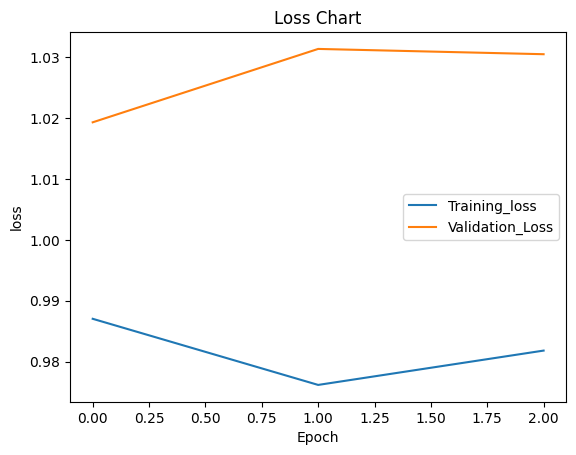

In [181]:

import matplotlib.pyplot as plt

history_dict = history.history
plt.plot(history_dict['loss'])
plt.plot(history_dict['val_loss'])
plt.legend(['Training_loss','Validation_Loss'])
plt.xlabel("Epoch")
plt.ylabel("loss")

plt.title("Loss Chart")
plt.show()

# Accuracy Chart

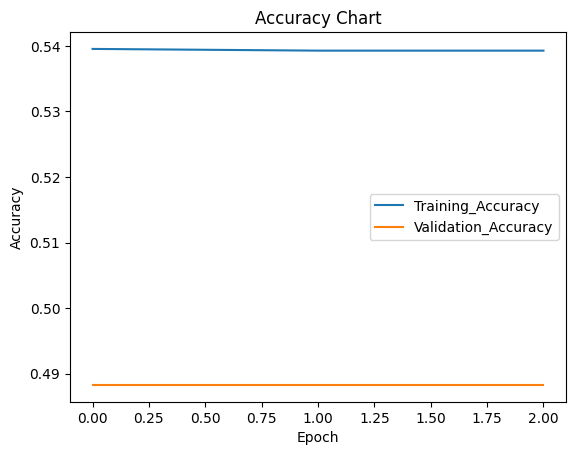

In [182]:

import matplotlib.pyplot as plt

history_dict = history.history
plt.plot(history_dict['accuracy'])
plt.plot(history_dict['val_accuracy'])
plt.legend(['Training_Accuracy','Validation_Accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Chart")
plt.show()

In [183]:
text_labels=encoder.classes_
print("These are categories",text_labels)


for i in range(0,100): #range can be any number suitable to the range of the dataset
    prediction = model.predict(np.array([x_test[i]])) #we have changed news data to numpy array to fit the requirements of the predict function
    predicted_label = text_labels[np.argmax(prediction[0])] #argmax
    # print(predicted_label)
    print(test_posts.iloc[i])
    # print(test_files_names.iloc[i])
    # print(prediction)
    print('Actual label:' + test_tags.iloc[i])
    print("Predicted label: " + predicted_label)
    print(prediction)

These are categories ['Negative' 'Neutral' 'Positive']
1/1 [==============================] - 1s 723ms/step
lead private road ambulance service company finland 
Actual label:Neutral
Predicted label: Neutral
[[0.33265525 0.59973913 0.44972014]]
1/1 [==============================] - 0s 54ms/step
finnish silicon wafer manufacturer okmetic oyj say swing net profit mln euro mln first nine month net loss mln euro mln year early 
Actual label:Positive
Predicted label: Neutral
[[0.33265525 0.59973913 0.44972014]]
1/1 [==============================] - 0s 53ms/step
gild expand research facility keep pace innovation 
Actual label:Neutral
Predicted label: Neutral
[[0.33265525 0.59973913 0.44972017]]
1/1 [==============================] - 0s 55ms/step
number one mean create add value stakeholder everything 
Actual label:Negative
Predicted label: Neutral
[[0.33265525 0.59973913 0.44972014]]
1/1 [==============================] - 0s 55ms/step
operate profit eur compare eur 
Actual label:Neutral
Pre

In [81]:
tex_labels=encoder.classes_

In [82]:
tex_labels

array(['Negative', 'Neutral', 'Positive'], dtype='<U8')